<a href="https://colab.research.google.com/github/SaiArjunSairamje/Probability-and-Stats/blob/main/confidence_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [ ]:
'''
The average time taken for customers to complete a purchase is 4 minutes with a standard deviation of 1 minute.
Find the probability that a randomly selected customer will complete a purchase within 6 minutes?
Assume Gaussian

'''

'\nThe average time taken for customers to complete a purchase is 4 minutes with a standard deviation of 1 minute. \nFind the probability that a randomly selected customer will complete a purchase within 6 minutes? \nAssume Gaussian\n\n'

In [ ]:
z = (6-4)/1

In [ ]:
norm.cdf(z)

0.9772498680518208

What is the probability that the average time of the next 5 customers is less than 6 minutes?

In [ ]:
sigma = 1
n = 5
sigma_sample = sigma/np.sqrt(n)
z = (6-4)/sigma_sample

norm.cdf(z)

0.9999961278917845

The average order value on an e-commerce website is 50, with a standard deviation of 5. What is the probability that a randomly selected order will have a value exceeding 60?

In [ ]:
z = (60-50)/5

1- norm.cdf(z)

0.02275013194817921

The average order value on an e-commerce website is 50, with a standard deviation of 5. What is the probability that the average of the next 3 orders exceeds 60?

In [ ]:
sigma = 5
n = 3
sigma_sample = sigma/np.sqrt(n)
z = (60-50)/sigma_sample
1 - norm.cdf(z)

0.00026600275256960515

Average body temperature has a mean of 98.6°F and a standard deviation of 0.5°F. What is the probability that a randomly chosen patient has a body temperature higher than 99.5°F?

In [ ]:
1 - norm.cdf((99.5 - 98.6)/0.5)

0.03593031911292488

Height

The mean height of a sample of 100 adults was found to be 65 inches, with a standard deviation of 2.5 inches. What is the mean height of the population?

In [ ]:
sigma = 2.5
sample_mean = 65
n = 100

In [ ]:
std_error = sigma/np.sqrt(n)

In [ ]:
std_error

0.25

In [ ]:
z1 = norm.ppf(0.025)
z1

-1.9599639845400545

In [ ]:
z2 = norm.ppf(0.975)
z2

1.959963984540054

In [ ]:
x1 = z1*std_error + 65
x1

64.51000900386498

In [ ]:
x2 = z2*std_error + 65
x2

65.48999099613502

In [ ]:
'''
With 95% confidence (there is 95% probability) , we can say that the true mean (the mean height of the population)
will be in the range [64.51 , 65.49]
'''

90% confidence interval

In [ ]:
z1 = norm.ppf(0.05)

z2 = norm.ppf(0.95)


In [ ]:
x1 = z1*std_error + 65
x2 = z2*std_error + 65

In [ ]:
print(x1, x2)

64.58878659326213 65.41121340673787


In [ ]:
'''
With 90% confidence, the mean height of the population will be in the range [64.59, 65.41]
'''

The sample mean recovery time of 100 patients after taking a drug was seen to be 10.5 days with a standard deviation of 2 days. Find the 95% confidence interval of the true mean.

In [ ]:
#crate function at the end
def calc_CI(mean, std, N, prob):

    std_err = std / np.sqrt(N)
    print("SE ", std_err)

    slice = (1 - (prob/100))/2
    print("slice ", slice)

    z1 = norm.ppf(slice)
    print("z1 ", z1)

    z2 = norm.ppf(1-slice)
    print("z2 ", z2)

    x1 = mean + ( z1 * std_err)
    x2 = mean + ( z2 * std_err)

    return x1, x2


In [ ]:
calc_CI(10.5, 2, 100, 95)

SE  0.2
slice  0.025000000000000022
z1  -1.959963984540054
z2  1.959963984540054


(10.10800720309199, 10.89199279690801)

The mean Youtube watch time of a sample of 100 students was found to be 3.5 hours, with a standard deviation of 1 hour. Construct a 90% confidence interval for the true watch time.


In [ ]:
calc_CI(3.5, 1, 100, 90)

SE  0.1
slice  0.04999999999999999
z1  -1.6448536269514729
z2  1.6448536269514722


(3.3355146373048528, 3.6644853626951472)

In [ ]:
sample_mean = 10.5
n = 100
sigma = 2


std_error = sigma/np.sqrt(100)
std_error

z1 = norm.ppf(0.025)
z2 = norm.ppf(0.975)

x1 = z1*std_error + 10.5
x2 = z2*std_error + 10.5

print(x1, x2)

10.108007203091988 10.89199279690801


In [ ]:
#Confidence interval using Bootstrap

In [ ]:
survey_1 = [35, 36, 33, 37, 34, 35] #less variance

In [ ]:
np.mean(survey_1)

35.0

Can we simulate more and more sets of samples like the ones above

In [ ]:
np.random.choice(survey_1)

36

In [ ]:
#sample with replacement
n = 6

np.random.choice(survey_1, size = n)

array([34, 35, 33, 37, 36, 35])

In [ ]:
np.random.choice(survey_1, size = n)

array([34, 33, 33, 35, 35, 37])

In [ ]:
bootstrapped_means_survey_1 = []
for reps in range(10000):
  bootstrapped_samples = np.random.choice(survey_1, size = n)
  bootstrapped_mean = np.mean(bootstrapped_samples) #median, any statitical function
  bootstrapped_means_survey_1.append(bootstrapped_mean)

<Axes: ylabel='Count'>

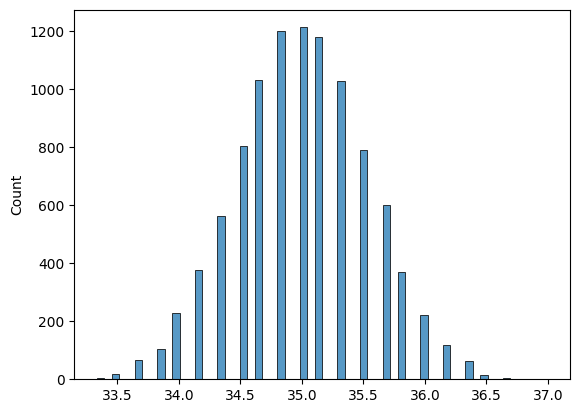

In [ ]:
sns.histplot(bootstrapped_means_survey_1)

In [ ]:
len(bootstrapped_means_survey_1)

10000

In [ ]:
bootstrapped_means_survey_1[:5]

[34.5, 34.666666666666664, 34.833333333333336, 34.833333333333336, 35.0]

In [ ]:
#survey2

In [ ]:
survey_2 = [20, 37, 17, 50, 53, 33] #more varaince

In [ ]:
b_m_s2 = []
n = 6

for i in range(10000):
  b_s = np.random.choice(survey_2, size = n)
  b_s_mean = np.mean(b_s)
  b_m_s2.append(b_s_mean)

<Axes: ylabel='Count'>

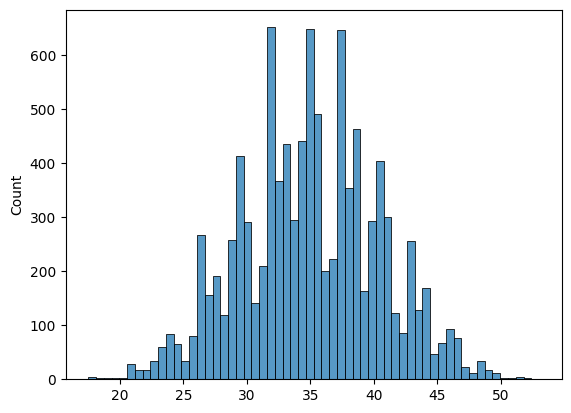

In [ ]:
sns.histplot(b_m_s2)

In [ ]:
#with 90% confidence interval --> true mean of the population


In [ ]:
x1 = np.percentile(bootstrapped_means_survey_1, 2.5) #getting the 2.5th percentile of this bootstrapped sample

In [ ]:
x1

34.0

In [ ]:
x2 = np.percentile(bootstrapped_means_survey_1, 97.5)

In [ ]:
x2

36.0

In [ ]:
#with 95% confidence, the mean salary of the population will be [34.0 , 36.0]

In [ ]:
x1 = np.percentile(b_m_s2, 2.5)
x2 = np.percentile(b_m_s2, 97.5)

print(x1, x2)

24.166666666666668 46.0
